# Assignment RandomForest FraudCheck

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
Data=pd.read_csv("Fraud_check.csv")

In [3]:
Data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
Data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


## EDA

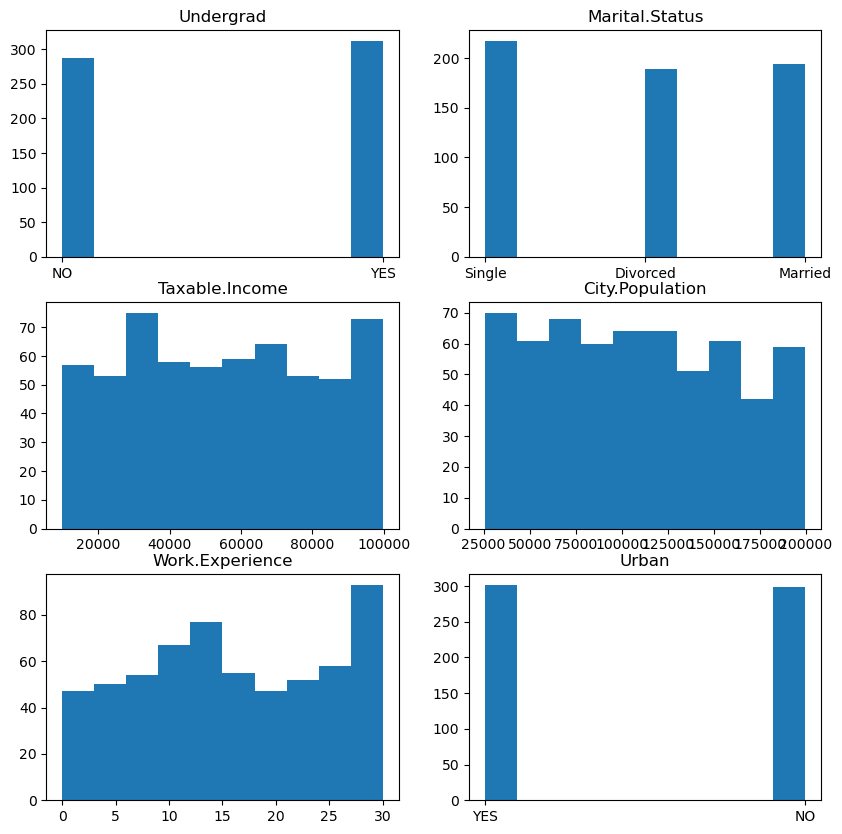

In [6]:
fig,axs=plt.subplots(3,2,figsize=(10,10))
axs[0][0].hist(Data["Undergrad"])
axs[0][0].set_title("Undergrad")
axs[0][1].hist(Data["Marital.Status"])
axs[0][1].set_title("Marital.Status")
axs[1][0].hist(Data["Taxable.Income"])
axs[1][0].set_title("Taxable.Income")
axs[1][1].hist(Data["City.Population"])
axs[1][1].set_title("City.Population")
axs[2][0].hist(Data["Work.Experience"])
axs[2][0].set_title("Work.Experience")
axs[2][1].hist(Data["Urban"])
axs[2][1].set_title("Urban")   
plt.show()

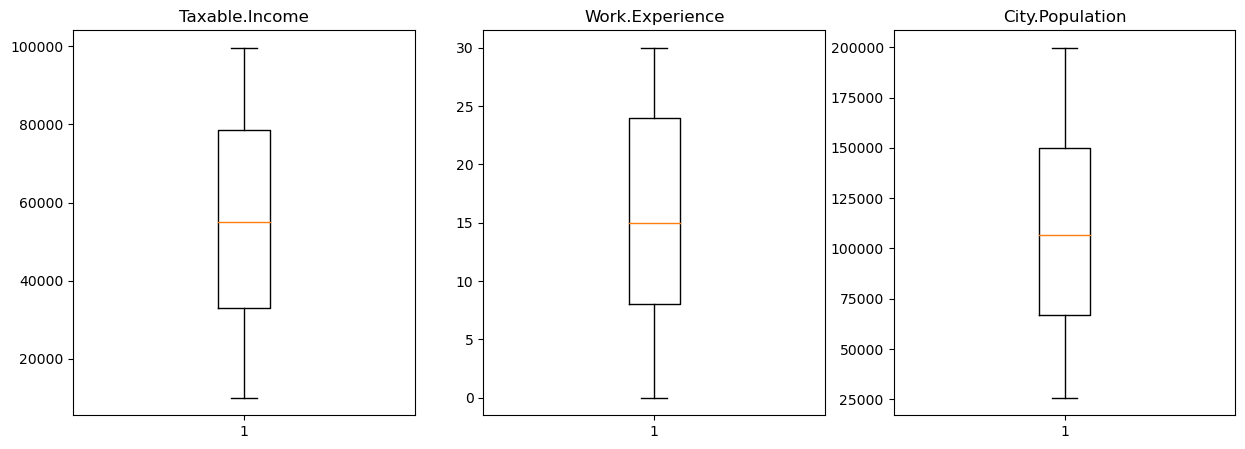

In [7]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].boxplot(Data["Taxable.Income"])
axs[0].set_title("Taxable.Income")
axs[1].boxplot(Data["Work.Experience"])
axs[1].set_title("Work.Experience")
axs[2].boxplot(Data["City.Population"])
axs[2].set_title("City.Population")
plt.show()

### Taxable . Income categorization

taxable_income <= 30000 as "Risky" and others are "Good"

In [8]:
Conditions=[(Data["Taxable.Income"]<=30000),(Data["Taxable.Income"]>30000)]
Categories=["Risky","Good"]

In [9]:
Data["Taxable.Income"]=np.select(Conditions,Categories)

In [10]:
Data["Taxable.Income"].unique()

array(['Good', 'Risky'], dtype=object)

In [11]:
Data["Taxable.Income"].describe()

count      600
unique       2
top       Good
freq       476
Name: Taxable.Income, dtype: object

In [12]:
Data["Taxable.Income"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 600 entries, 0 to 599
Series name: Taxable.Income
Non-Null Count  Dtype 
--------------  ----- 
600 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB


In [13]:
Data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


### Label Encoder

In [14]:
label=LabelEncoder()

In [15]:
Data["Taxable.Income"]=label.fit_transform(Data["Taxable.Income"])

### Dummy variable creation

In [16]:
Data=pd.get_dummies(Data,columns=["Undergrad","Marital.Status","Urban"])

In [17]:
Data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


### X and Y splittig of Data

In [18]:
X=Data.drop(["Taxable.Income"],axis=1)
Y=Data["Taxable.Income"]

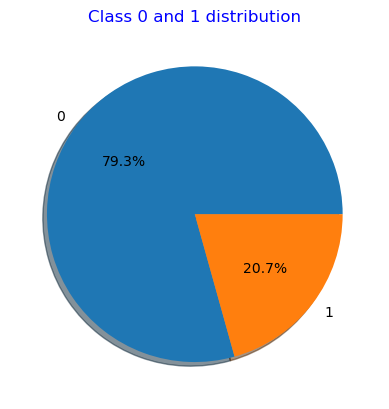

In [19]:
plt.title("Class 0 and 1 distribution",color="blue")
plt.pie(Y.value_counts(), labels=Y.unique(), shadow=True, autopct='%1.1f%%')
plt.show()

The dataset is unbalanced

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,shuffle=True)

In [21]:
X.describe()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333
std,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
Y.describe()

count    600.000000
mean       0.206667
std        0.405252
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Taxable.Income, dtype: float64

In [23]:
Y[Y==1].value_counts()

1    124
Name: Taxable.Income, dtype: int64

In [24]:
Y[Y==0].value_counts()

0    476
Name: Taxable.Income, dtype: int64

In [25]:
Data[Data.duplicated()]

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES


### Hyper Parameter tuning for Random Forest using Grid Search CV

In [26]:
est=RandomForestClassifier(max_depth=5,min_samples_split=2,random_state=42)
params = {"criterion":('gini','entropy'),"n_estimators":(1,100,5),"max_features": ("auto", "sqrt", "log2")
         }


In [27]:
GCV=GridSearchCV(estimator=est,param_grid=params,cv=5)

## Model Building with train test split method

In [28]:
modelgcv=GCV.fit(X_train,Y_train)

In [29]:
results = GCV.cv_results_
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100} Score: 0.79375
Parameters: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100} Score: 0.79375
Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100} Score: 0.79375
Parameters: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100} Score: 0.7916666666666666
Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100} Score: 0.7916666666666666
Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100} Score: 0.7916666666666666
Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 5} Score: 0.7854166666666667
Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 5} Score: 0.7854166666666667
Parameters: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 5} Score: 0.7854166666666667
Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 5}

In [30]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [31]:
GCV.best_score_

0.79375

## Final model as per Grid Search Cv

In [32]:
Model=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=5
                             ,n_estimators=100,max_features='auto',random_state=42)

In [33]:
Model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [34]:
predtrain=Model.predict(X_train)
pd.Series(predtrain).value_counts()

0    436
1     44
dtype: int64

In [35]:
predtest=Model.predict(X_test)
pd.Series(predtest).value_counts()

0    118
1      2
dtype: int64

##### Training Accuracy

In [36]:
print(accuracy_score(Y_train,Model.predict(X_train)))

0.8854166666666666


In [37]:
print(classification_report(Y_train,Model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       381
           1       1.00      0.44      0.62        99

    accuracy                           0.89       480
   macro avg       0.94      0.72      0.77       480
weighted avg       0.90      0.89      0.87       480



##### Testing Accuracy

In [38]:
print(accuracy_score(Y_test,Model.predict(X_test)))

0.8083333333333333


In [39]:
print(classification_report(Y_test,Model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        95
           1       1.00      0.08      0.15        25

    accuracy                           0.81       120
   macro avg       0.90      0.54      0.52       120
weighted avg       0.85      0.81      0.74       120



For training set class 1 accuracy very less due to unbalanced data set let us go with Kfold and Combined sampling with 
SMOTET and Tomeklinks

## Model with KFold Technique

In [40]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

In [41]:
Modelkfold=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5,
                                  max_features='auto',random_state=42)

In [42]:
results = cross_val_score(Modelkfold, X, Y, cv=kfold)
print(results.mean())

0.7683333333333333


In [43]:
y_pred = cross_val_predict(Modelkfold, X, Y, cv=kfold)

# Get classification report for predicted target values
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       476
           1       0.06      0.01      0.01       124

    accuracy                           0.77       600
   macro avg       0.42      0.49      0.44       600
weighted avg       0.64      0.77      0.69       600



By both train test split and kfold class one not predicting properly due to unbalanced dataset .So let us go for Combined sampling with SMOTE and TomekLinks

## Combined Sampling

In [44]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [45]:
SMOTE = SMOTETomek(random_state=42)
TM = TomekLinks()
X_train_res, y_train_res = TM.fit_resample(X_train,Y_train)
X_train_res, y_train_res = SMOTE.fit_resample(X_train_res, y_train_res)

In [46]:
modelCOMGCV=GCV.fit(X_train_res, y_train_res)

In [47]:
results = GCV.cv_results_
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100} Score: 0.7755069652618586
Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100} Score: 0.7755069652618586
Parameters: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100} Score: 0.7755069652618586
Parameters: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100} Score: 0.7717686475048493
Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100} Score: 0.7717686475048493
Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100} Score: 0.7717686475048493
Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 5} Score: 0.7586669017809909
Parameters: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 5} Score: 0.7586669017809909
Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 5} Score: 0.7586669017809909
Parameters: {'criterion': 'entropy', 'max_features':

In [48]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [49]:
GCV.best_score_

0.7755069652618586

In [50]:
# train decision tree on resampled training set
clf = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5,
                             max_features='auto',random_state=42)
clf.fit(X_train_res,y_train_res)

# evaluate decision tree on testing set
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        95
           1       0.24      0.16      0.19        25

    accuracy                           0.72       120
   macro avg       0.52      0.51      0.51       120
weighted avg       0.68      0.72      0.70       120



# Conclusion 

When using Kfold validation each class accuracy as well as total accuracy improved than train_test_split method

Random forest shows better accuracy than Decision tree.

In train_test split test accuracy reduced so in kfold accuracy little improved